In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
data=pd.read_csv("Scenario-A-merged_5s.csv")
data=data.replace([np.inf,-np.inf],np.nan)
data=data.dropna()
data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


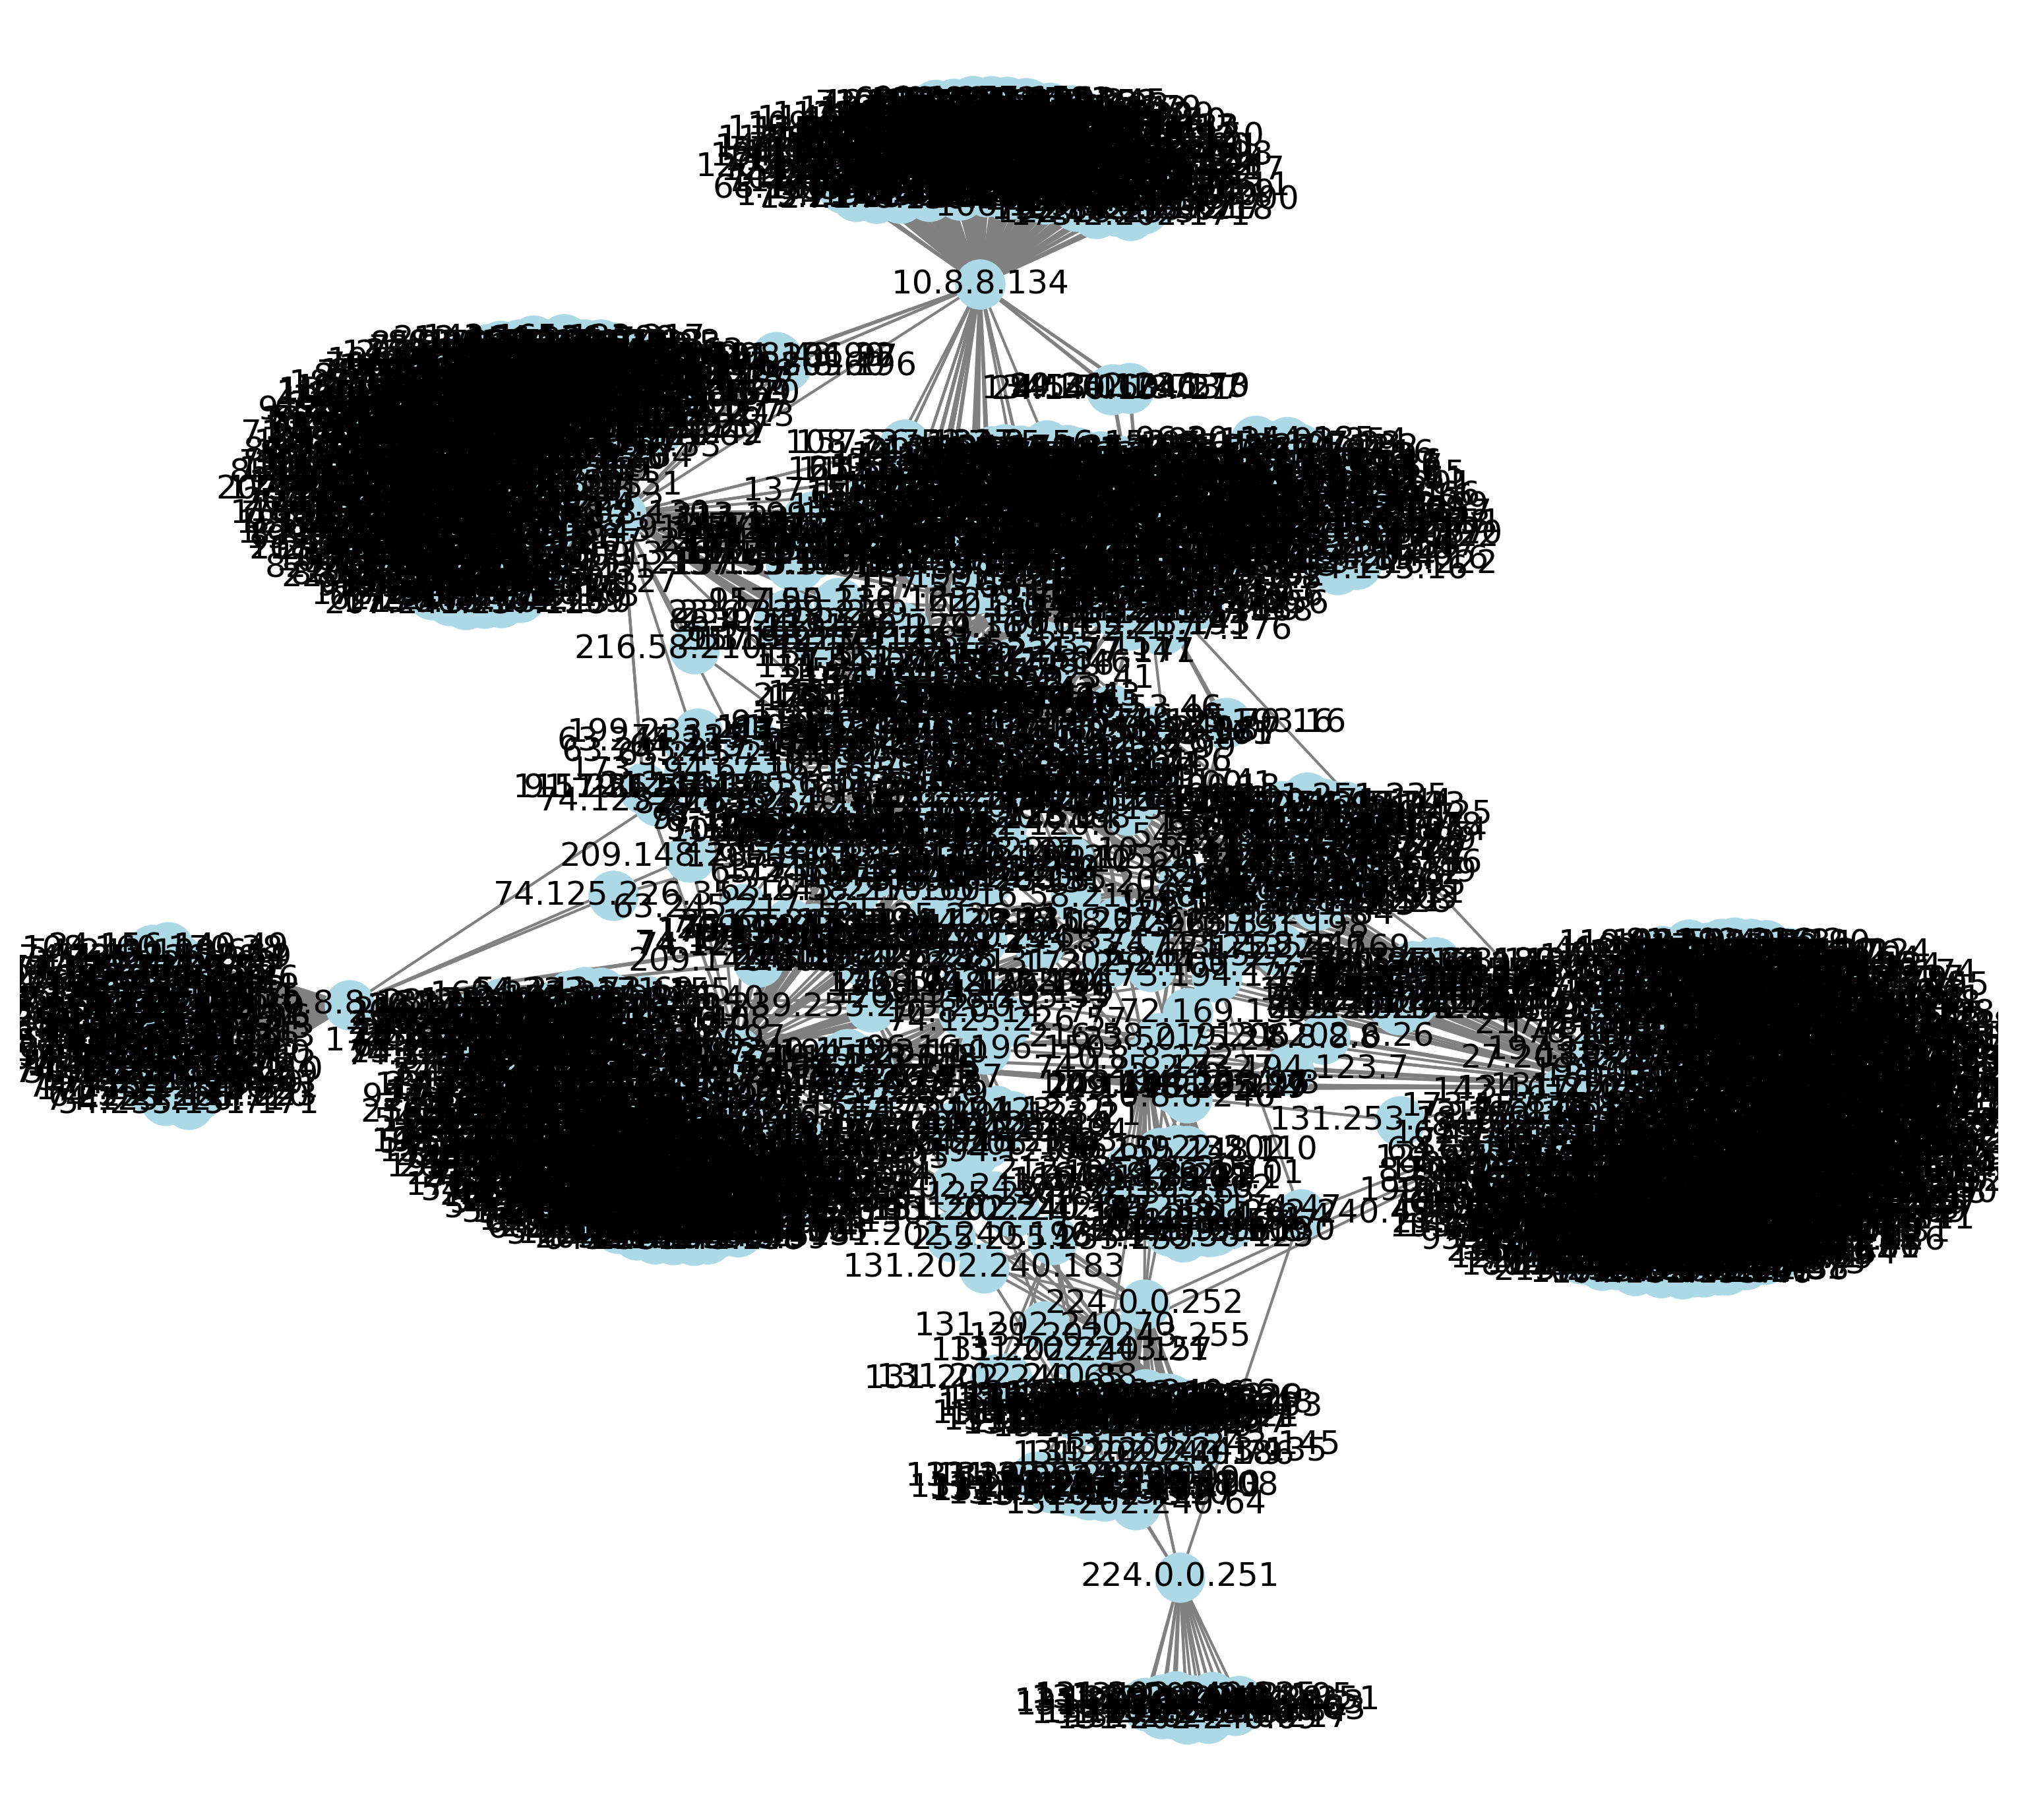

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
users=[]
# 遍历 DataFrame 的行，并添加边到图中  
for index, row in data.iterrows():  
    source = row['Source IP']  
    target = row[' Destination IP']  
    G.add_edge(source, target)
plt.figure(figsize=(10,9),dpi=300)
pos = nx.spring_layout(G)  # 为图设置布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

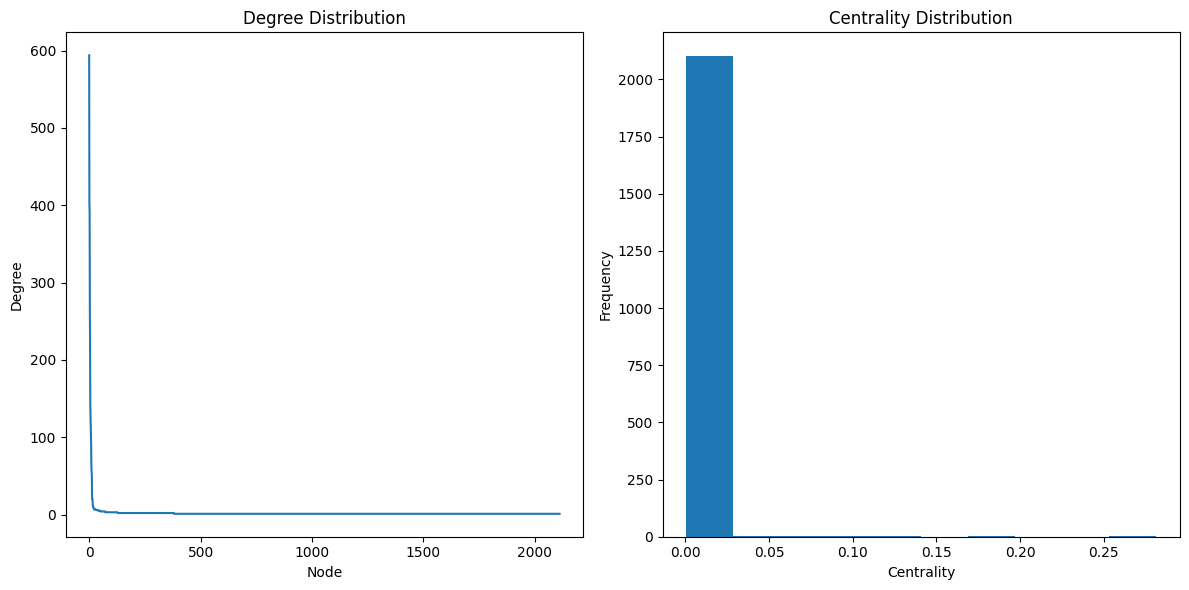

In [8]:
# 计算度分布
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # 度序列
# 计算中心性分布，这里以度中心性为例
centrality = nx.degree_centrality(G)
# 节点度分布图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1行2列的第一个
plt.plot(degree_sequence)
plt.title("Degree Distribution")
plt.xlabel("Node")
plt.ylabel("Degree")
# 中心性分布图
centrality_values = list(centrality.values())
plt.subplot(1, 2, 2)  # 1行2列的第二个
plt.hist(centrality_values, bins=10)
plt.title("Centrality Distribution")
plt.xlabel("Centrality")
plt.ylabel("Frequency")
plt.tight_layout()  # 调整子图间距
plt.show()

In [9]:
data=data.drop(['Source IP', ' Destination IP', ' Source Port', ' Destination Port'],axis=1)
data.head()

,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,6,435,0.0,4597.701149,435.0,0.0,435,435,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,6,259,0.0,7722.007722,259.0,0.0,259,259,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,6,891,0.0,2244.668911,891.0,0.0,891,891,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,6,1074,0.0,1862.197393,1074.0,0.0,1074,1074,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,6,315,0.0,6349.206349,315.0,0.0,315,315,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# 假设您的数据存储在DataFrame中，名为df
# 首先，根据'label'列的值将数据分为TOR和nonTOR两组
tor_group = data[data['label'] == 'TOR']
non_tor_group = data[data['label'] == 'nonTOR']

# 接下来，对除了最后一列以外的每一列进行独立样本t检验
# 假设最后一列是'label'列，我们排除这一列进行t检验
columns_to_test = [col for col in data.columns if col != 'label']

# 存储t检验结果的字典
ttest_results = {}

for column in columns_to_test:
    # 进行独立样本t检验
    t_stat, p_val = ttest_ind(tor_group[column], non_tor_group[column])
    
    # 将结果存储在字典中
    ttest_results[column] = {'T-statistic': t_stat, 'P-value': p_val}

# 打印t检验结果
for column, result in ttest_results.items():
    print(f"Column: {column}")
    print(f"T-statistic: {result['T-statistic']}, P-value: {result['P-value']}")
    print("-" * 40)

Column:  Protocol
T-statistic: -156.18458143333447, P-value: 0.0
----------------------------------------
Column:  Flow Duration
T-statistic: 157.29567018040314, P-value: 0.0
----------------------------------------
Column:  Flow Bytes/s
T-statistic: 1.701913897307739, P-value: 0.08877520243788325
----------------------------------------
Column:  Flow Packets/s
T-statistic: -5.715278433918189, P-value: 1.0989308355972995e-08
----------------------------------------
Column:  Flow IAT Mean
T-statistic: -46.56611194247195, P-value: 0.0
----------------------------------------
Column:  Flow IAT Std
T-statistic: -0.3216282833275223, P-value: 0.7477351129681153
----------------------------------------
Column:  Flow IAT Max
T-statistic: -5.52432911985754, P-value: 3.317221213414633e-08
----------------------------------------
Column:  Flow IAT Min
T-statistic: -45.21185357203429, P-value: 0.0
----------------------------------------
Column: Fwd IAT Mean
T-statistic: -33.644788110779054, P-val

e:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


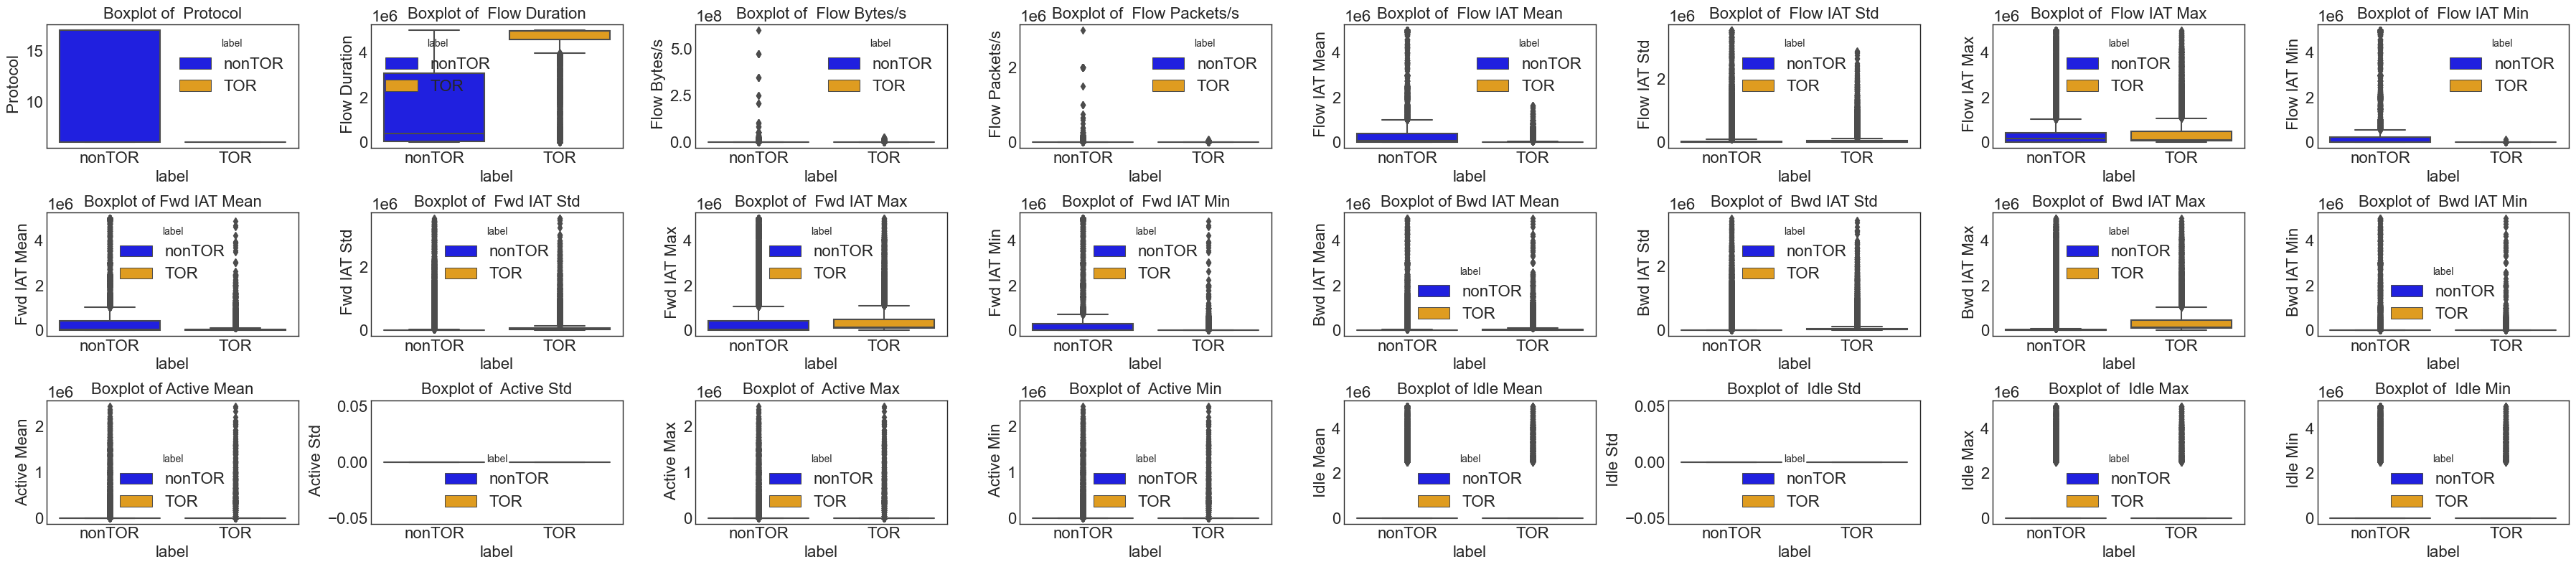

In [27]:
# 创建一个画布，并设置大小
columns_to_plot = [col for col in data.columns if col != 'label']
plt.figure(figsize=(36, 8))

# 对每一列进行箱线图绘制
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 8, i)
    # 绘制箱线图，hue参数用于分组
    sns.boxplot(x='label', y=column, data=data, hue='label', palette=['blue', 'orange'], dodge=False)
    # 设置标题
    plt.title(f'Boxplot of {column}')
    # 设置y轴标签
    plt.ylabel(column)
    # 显示图例
    plt.legend(title='label')

# 调整子图间距
plt.tight_layout()
# 显示图形
plt.show()

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data[' Protocol'], data['label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 18911.210861289088
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[ 6977.53149536 33514.46850464]
 [ 7529.46850464 36165.53149536]]


In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.5.2
0.12.2


e:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


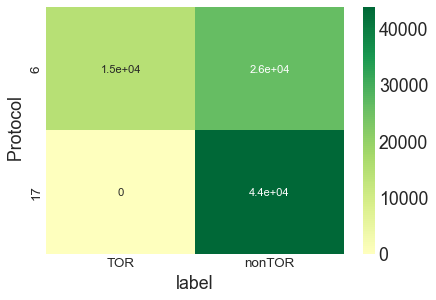

In [15]:
plt.figure(figsize=(6,4), dpi= 80)
sns.heatmap(contingency_table, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

e:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


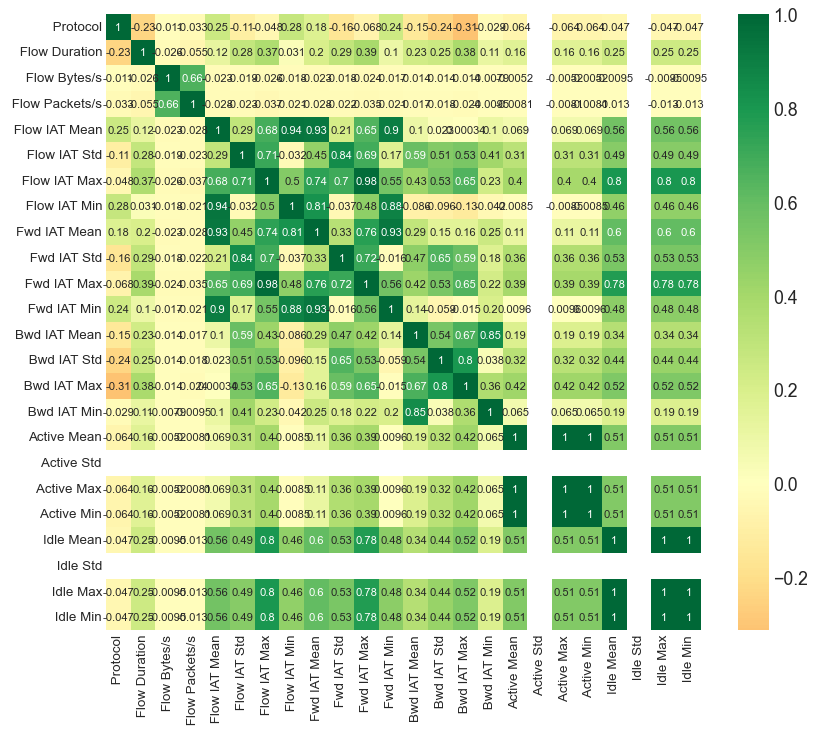

In [9]:
data=data.dropna()
data.drop([])
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="label", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

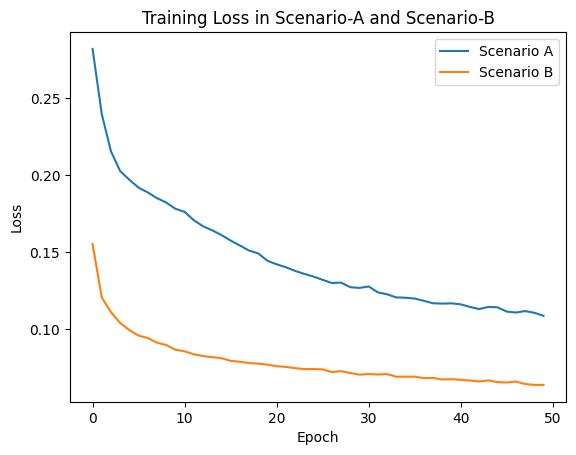

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件中的sheet2
df = pd.read_excel('工作簿1.xlsx', sheet_name='Sheet2')

# 假设我们感兴趣的列是'scenario-A'和'scenario-B'
# 将每个单元格按':'分割并取后面的部分，然后转换为浮点数
df['Scenario-A'] = df['Scenario-A'].apply(lambda x: float(x.split(':')[1].strip()))
df['Scenario-B'] = df['Scenario-B'].apply(lambda x: float(x.split(':')[1].strip()))

# 绘制条形图
# 为了并排放置条形图，我们需要设置两组数据的x轴位置

plt.plot(df['Scenario-A'], label='Scenario A')
plt.plot(df['Scenario-B'], label='Scenario B')


# 添加标签、标题和图例
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss in Scenario-A and Scenario-B')
plt.legend()

# 显示图表
plt.show()

In [9]:
import pandas as pd
test=pd.read_csv("testdata.csv")
test['output']

0        chat
1       audio
2        file
3        mail
4         p2p
        ...  
1995     mail
1996      p2p
1997    audio
1998    audio
1999    video
Name: output, Length: 2000, dtype: object

In [10]:
pred=pd.read_csv("Predict_result.csv")
pred['0']

0        chat
1       audio
2        file
3        mail
4         p2p
        ...  
1995     mail
1996      p2p
1997    audio
1998    audio
1999    video
Name: 0, Length: 2000, dtype: object

In [16]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
print(classification_report(test['output'],pred['0']))

y_true=test['output']
y_pred=pred['0']
# 计算准确率
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# 计算精确度
precision = precision_score(y_true, y_pred, average='weighted')  # 'macro'平均考虑所有标签
print(f"Precision: {precision}")

# 计算召回率
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")

# 计算F1分数
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
       audio       0.99      0.94      0.97       250
    browsing       0.92      0.95      0.94       250
        chat       1.00      0.99      1.00       250
        file       0.98      1.00      0.99       250
        mail       1.00      1.00      1.00       250
         p2p       0.96      0.95      0.95       250
       video       1.00      0.94      0.97       250
        voip       1.00      0.98      0.99       250

    accuracy                           0.97      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.98      0.97      0.97      2000

Accuracy: 0.9685
Precision: 0.9802831748918674
Recall: 0.9685
F1 Score: 0.9741205177006418


e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined a

e:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


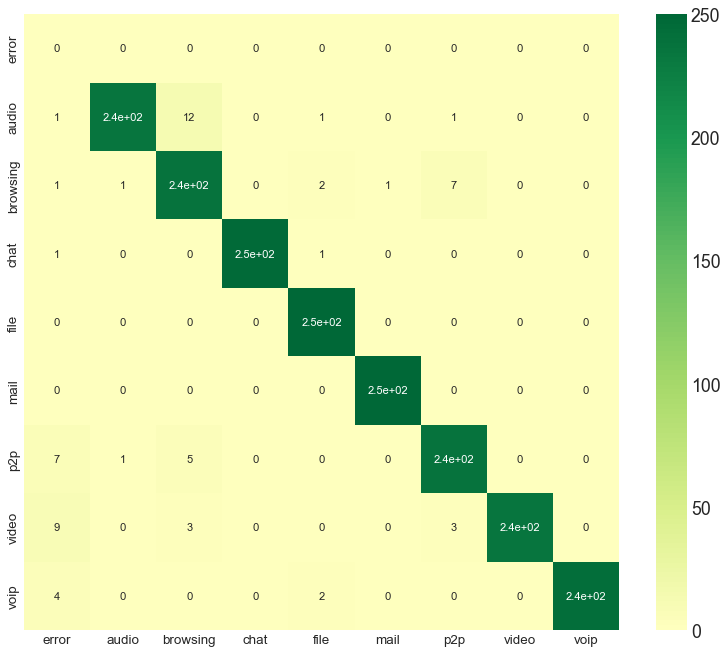

In [21]:
from sklearn.metrics import confusion_matrix
df=confusion_matrix(y_true,y_pred)
# Plot

col=['error','audio','browsing','chat','file','mail','p2p','video','voip']
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df, xticklabels=col, yticklabels=col, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()